In [3]:
# packages
import matplotlib.pyplot as plt
import matplotlib
import json
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.pyplot import xticks
import sys
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

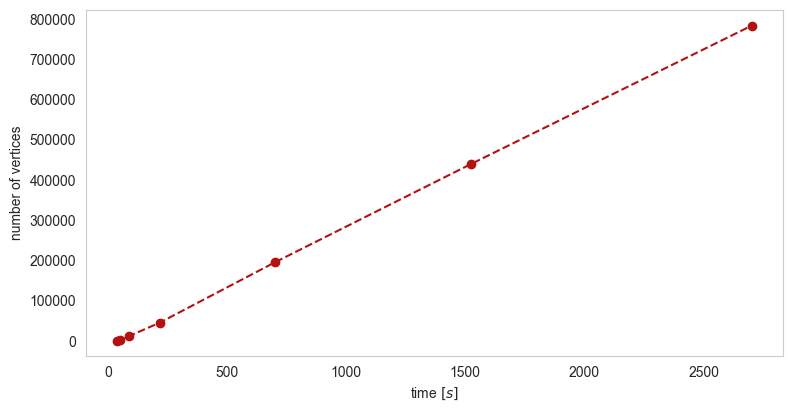

In [54]:
# rendering time for cell doublet - manually, against number of vertices in the scene
#sns.set_style("whitegrid")

times = [39.977, 51.524, 88, 216.505, 701.363, 1525.817, 2701.701]
vertices = [896, 3104, 12224, 45396, 195776, 440288, 783392]
faces = [888, 3098, 12216, 45390, 195778, 440280, 783384]

enum = list(range(len(times)))
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 0.7, len(enum))
colors = [hsv2rgb(hue) for hue in hues]

fig, ax = plt.subplots(1, figsize = (9, 4.5))
blue, = sns.color_palette("muted", 1)

ax.plot(times, vertices, 'o--', color = colors[0])

plt.ylabel('number of vertices')
plt.xlabel('time $[s]$')
ax.grid()    

plt.savefig("M:\Goo-rendering\\simulation_time.png", dpi=500, transparent=False)
#plt.show()


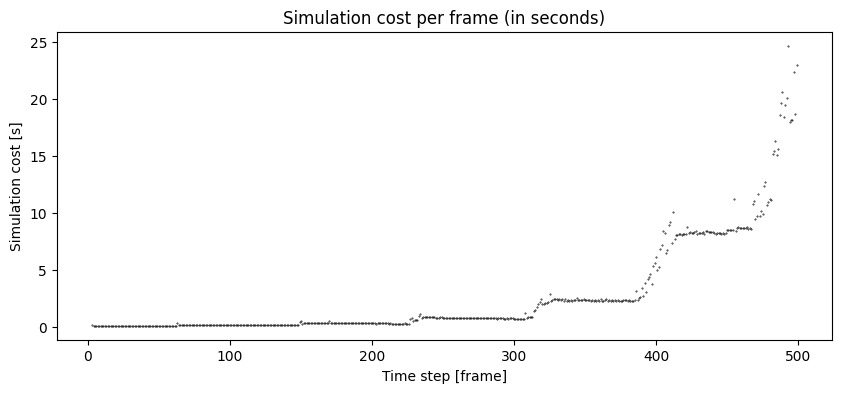

In [38]:
# plot simulation time per frame, needs to _times data
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20231218_division_2xtargetvolume-based_1-500/20231218_division_2xtargetvolume-based_times.json", 'r') as f1:
    times1 = json.load(f1)

rendering_times_per_frame = {}
previous_time = 0

for frame, cumulative_time in times1.items():
    frame_num = int(frame)
    frame_time = cumulative_time - previous_time
    rendering_times_per_frame[frame_num] = frame_time
    previous_time = cumulative_time

X = [int(time) for time in rendering_times_per_frame.keys()]
y = rendering_times_per_frame.values()


plt.figure(figsize=(10,4))
plt.scatter(X,y, s = 0.15, c='black')
plt.xlabel('Time step [frame]')
plt.ylabel('Simulation cost [s]')
plt.title("Simulation cost per frame (in seconds)")
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20231218_division_2xtargetvolume-based_1-500/simulation_cost_per_frame.png", dpi=500)

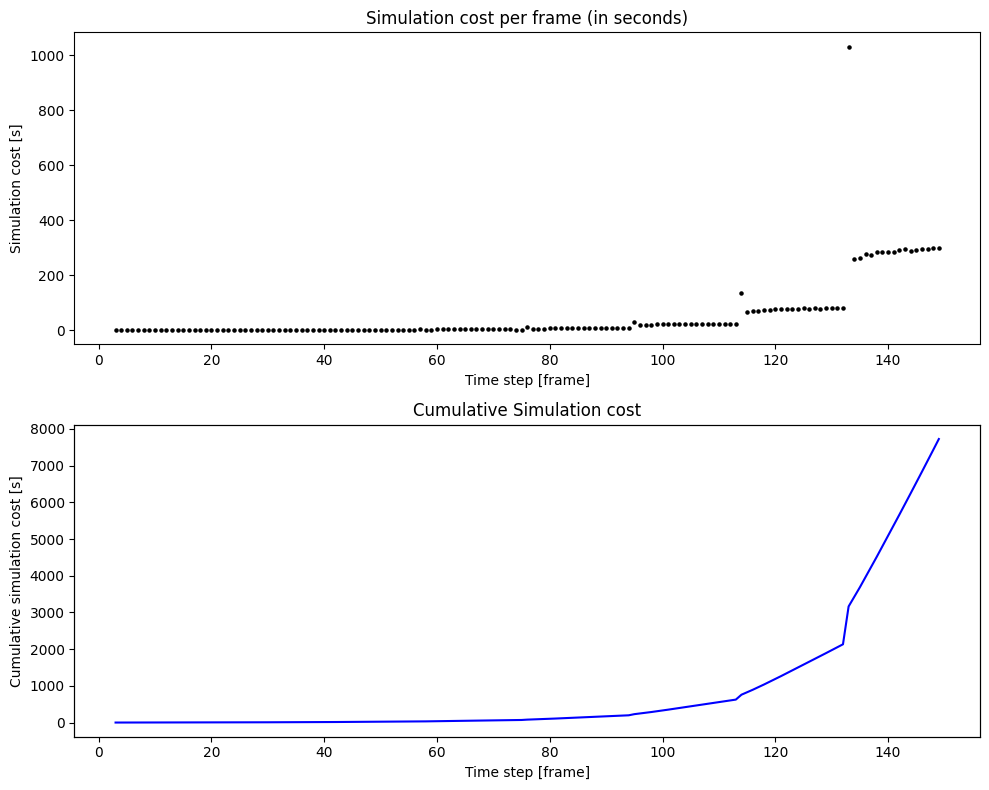

In [4]:
import json
import matplotlib.pyplot as plt

# Plot simulation time per frame
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_times.json", 'r') as f1:
    times1 = json.load(f1)

rendering_times_per_frame = {}
previous_time = 0

for frame, cumulative_time in times1.items():
    frame_num = int(frame)
    frame_time = cumulative_time - previous_time
    rendering_times_per_frame[frame_num] = frame_time
    previous_time = cumulative_time

X = [int(time) for time in rendering_times_per_frame.keys()]
y = rendering_times_per_frame.values()

plt.figure(figsize=(10, 8))

# Plot simulation cost per frame
plt.subplot(2, 1, 1)
plt.scatter(X, y, s=5, c='black')
plt.xlabel('Time step [frame]')
plt.ylabel('Simulation cost [s]')
plt.title("Simulation cost per frame (in seconds)")

# Plot cumulative simulation cost
plt.subplot(2, 1, 2)
plt.plot(X, list(times1.values()), c='blue')
plt.xlabel('Time step [frame]')
plt.ylabel('Cumulative simulation cost [s]')
plt.title("Cumulative Simulation cost")

# Create a twinx axis for cumulative simulation cost
ax2 = plt.gca().twinx()
ax2.set_yticks([])  # Hide the y-ticks for the twinx axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/simulation_cost_and_cumulative_cost.png", dpi=300)
plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_19990/4229026400.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fitted, y_fitted, 'r-', color='darkred', label=f'exponential fit: $y = {a:.2f} e^{{{b:.2f}x}}$')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


149
147
R² = 0.9893635891501587


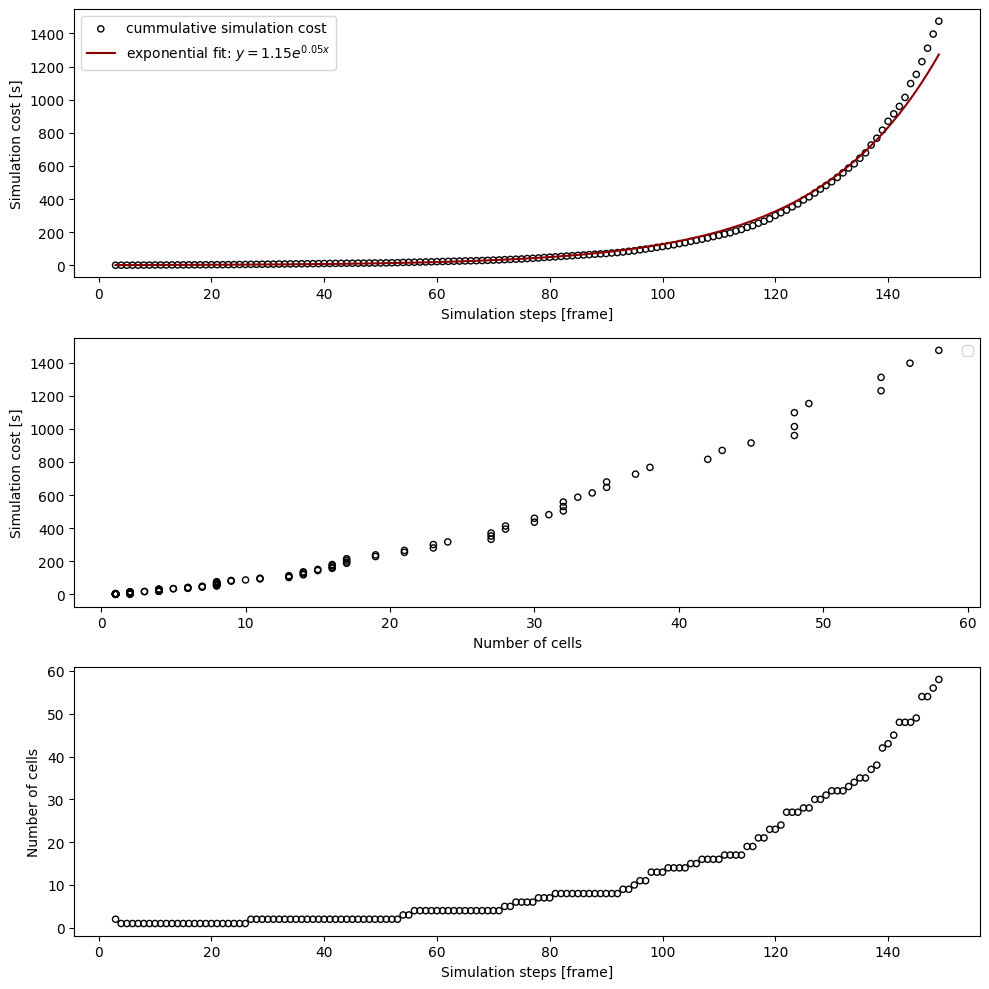

In [96]:
import json
import matplotlib.pyplot as plt

# Plot simulation time per frame
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30/20240227_division_frame150_targetvolume30_times.json", 'r') as f1:
    times1 = json.load(f1)
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30/20240227_division_frame150_targetvolume30_frame_cells.json", 'r') as f1:
    cells1 = json.load(f1)

# Extract X and Y data for fitting
X_frame = np.array([int(frame) for frame in times1.keys()])
simulation_cost = np.array(list(times1.values()))

# Initialize a dictionary to store the number of cells at each frame
cells_per_frame = {}

# Iterate over each cell
for cell, frames in cells1.items():
    # Iterate over the frames the cell appears in
    for frame in frames:
        # If the frame is not already in the dictionary, add it with a count of 1
        # Otherwise, increment the count
        if frame not in cells_per_frame:
            cells_per_frame[frame] = 1
        else:
            cells_per_frame[frame] += 1
# Extract simulation cost and number of cells
num_cells = list(cells_per_frame.values())
print(len(num_cells))
print(len(simulation_cost))

# Fit a polynomial of degree 1 (a linear function) to the data
p = np.polyfit(X, np.log(simulation_cost), 1)

# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(X), np.max(X), 147)
y_fitted = a * np.exp(b * x_fitted)

# determine quality of the fit
squaredDiffs = np.square(simulation_cost - y_fitted)
squaredDiffsFromMean = np.square(simulation_cost - np.mean(simulation_cost))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)

# Plot simulation cost per frame
#plt.scatter(X, y, s=20, color='black', marker='o', facecolors='none', edgecolors='black', label='cummulative simulation cost')
plt.scatter(X, simulation_cost, s=20, color='black', marker='o', facecolors='none', edgecolors='black', label='cummulative simulation cost')
plt.xlabel('Simulation steps [frame]')
plt.ylabel('Simulation cost [s]')
plt.plot(x_fitted, y_fitted, 'r-', color='darkred', label=f'exponential fit: $y = {a:.2f} e^{{{b:.2f}x}}$')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(num_cells[:-2], simulation_cost, s=20, color='black', marker='o', facecolors='none', edgecolors='black')
plt.xlabel('Number of cells')
plt.ylabel('Simulation cost [s]')
#plt.plot(x_fitted, y_fitted, 'r-', color='darkred', label=f'exponential fit: $y = {a:.2f} e^{{{b:.2f}x}}$')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X, num_cells[:-2], s=20, color='black', marker='o', facecolors='none', edgecolors='black')
plt.ylabel('Number of cells')
plt.xlabel('Simulation steps [frame]')


plt.tight_layout()
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30/simulation_cost_and_cumulative_cost.png", dpi=300)
plt.show()


R² = 0.9762487051628729


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_19990/1896594274.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fitted, y_fitted, 'r-', color='darkred', label=f'exponential fit: $y = {a:.2f} e^{{{b:.2f}x}}$')


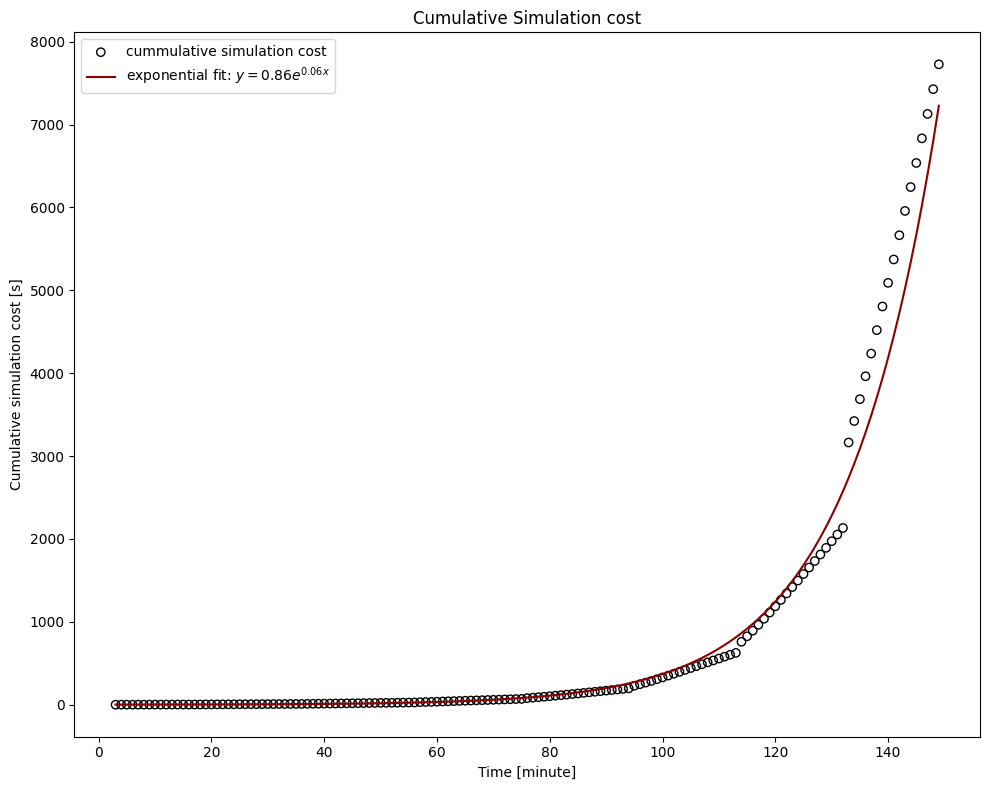

In [57]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data from JSON file
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/20240227_division_targetvolume30_synchronous5_times.json", 'r') as f:
    times_data = json.load(f)

# Extract X and Y data for fitting
X = np.array([int(frame) for frame in times_data.keys()])
y = np.array(list(times_data.values()))

# Fit a polynomial of degree 1 (a linear function) to the data
p = np.polyfit(X, np.log(y), 1)

# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(X), np.max(X), 147)
y_fitted = a * np.exp(b * x_fitted)

# determine quality of the fit
squaredDiffs = np.square(y - y_fitted)
squaredDiffsFromMean = np.square(y - np.mean(y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X, y, label='cummulative simulation cost', color='black', marker='o', facecolors='none', edgecolors='black')
plt.plot(x_fitted, y_fitted, 'r-', color='darkred', label=f'exponential fit: $y = {a:.2f} e^{{{b:.2f}x}}$')
plt.xlabel('Time [minute]')
plt.ylabel('Cumulative simulation cost [s]')
plt.title("Cumulative Simulation cost")
plt.legend()
plt.tight_layout()
#plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20240227_division_targetvolume30_synchronous/simulation_cost_and_cumulative_cost_with_fit.png", dpi=300)
plt.show()
